# <p style="text-align: center;">Google Data Analitics certificata - Capstone project</p>

## The Project Overview can be found [here](https://banza5123.github.io/Personal-projects/)


### Ask Phase

In the "Ask" phase, it was decided that my primary objective is to provide Invest INC. with data-driven insights and recommendations for the optimal allocation of funds among cryptocurrencies within their portfolio. To achieve this, I will perform the following key tasks:

1. **Coin Analysis**: Each cryptocurrency in the portfolio, including Bitcoin (BTC), Dogecoin, and Ravencoin, will undergo a comprehensive analysis. This analysis aims to evaluate their historical performance and identify unique characteristics that impact their suitability for the portfolio.

2. **Data Collection and Preparation**: I will collect and organize historical data for these cryptocurrencies, including price trends, trading volumes, and other relevant metrics. Proper data preparation is essential to ensure the accuracy and consistency of the analysis.

3. **Comparison and Optimization**: Through meticulous data analysis, I will compare the historical performance of these cryptocurrencies and their price fluctuations over time. By identifying trends and patterns, I will recommend an optimized cryptocurrency allocation strategy.

**Primary Stakeholders**: The primary stakeholders of this project are the representatives of Invest INC. Their insights, goals, and feedback are crucial in shaping the analysis and recommendations, aligning them with the company's investment objectives.

By adhering to a structured methodology, the aim is to provide Invest INC. with actionable insights and strategies for enhancing their cryptocurrency portfolio allocation.

Please note that this project is for educational and demonstration purposes, and Invest INC. is a fictional company.

### Prepare Phase: Data Collection and Initial Processing

In the "Prepare" phase, the primary objective was to collect historical data for three cryptocurrencies: Bitcoin (BTC), Dogecoin (DOGE), and Ravencoin (RVN). The data was sourced from [coinmetrics.io](https://coinmetrics.io/community-network-data/) in CSV format, providing a comprehensive historical record of these digital assets.

The subsequent steps were aimed at preparing the data for in-depth analysis by integrating it into a personal MySQL database using MySQL Workbench. This approach mirrors real-world data analysis processes, where database queries play a central role in deriving insights. The following actions were performed in the "Prepare" phase:

1. **Data Collection**: Historical data for BTC, DOGE, and RVN was diligently collected from [coinmetrics.io](https://coinmetrics.io/community-network-data/) in CSV format. This data encompassed crucial information about the cryptocurrencies, including market prices, transaction volumes, and network metrics.

2. **Data Integration into MySQL**: The collected CSV data was thoughtfully inserted into a personal MySQL instance using MySQL Workbench. This process ensured that the data was stored in a structured and queryable format, facilitating subsequent analysis.

3. **Exploring SQL Module for Jupyter Notebook**: To seamlessly work with the MySQL database within the Jupyter Notebook environment, the SQL module was loaded. This step enabled the execution of SQL queries directly from the notebook, streamlining the data retrieval process.

4. **Database Connection**: Establishing a connection to the local MySQL database was a pivotal step. It allowed for efficient querying and retrieval of data from the database tables.

5. **Initial Data Exploration**: A preliminary examination of the tables within the MySQL database was conducted. This served as an initial understanding of the data's structure and layout. It is an essential step to grasp the available resources for analysis.

6. **Table Joins and Conversion to Pandas Dataframe**: Tables were joined strategically to combine relevant data from different sources. This cohesive approach aimed to create a comprehensive dataset that would be further analyzed. The resulting dataset was then converted into a Pandas dataframe, a versatile tool for data manipulation and analysis.

7. **Removing Duplicate Columns**: To ensure data cleanliness and avoid redundancy, duplicate columns within the combined dataset were meticulously removed. This optimization step enhances the dataset's usability and clarity.

8. **Data Overview**: Obtaining an overview of the Pandas dataframe was the final action in this phase. This summary provided an initial glimpse of the data's characteristics, including its dimensions, data types, and key statistics.

9. **Price Data Normalization**: It's worth noting that the price data in the dataset has been normalized. Normalization allows for meaningful comparisons between different cryptocurrencies by standardizing the price values. This normalization step ensures that price data is on a consistent scale, facilitating more accurate analysis.

The "Prepare" phase represents a critical foundation for subsequent data analysis. The integration of data into a MySQL database, was done with MySQL Workbench, and its conversion into a Pandas dataframe form the basis for more advanced analytical tasks in the following phases.


#### Loading jupysql module to use SQL inside this notebook

In [ ]:
load_ext sql

#### Connecting to my local mysql server

In [ ]:
%sqlcmd connect

#### Exploring the tables and the headers

In [85]:
%sql show tables;

Running query in 'default'

3 rows affected.

Tables_in_crypto
btc
doge
rvn


In [86]:
%sql describe btc;

Running query in 'default'

8 rows affected.

Field,Type,Null,Key,Default,Extra
Key,int,YES,,None,
time,datetime,YES,,None,
HashRate-BTC,double,YES,,None,
VelCur1yr-BTC,double,YES,,None,
VtyDayRet180d-BTC,double,YES,,None,
VtyDayRet30d-BTC,double,YES,,None,
principal_market_price_usd-BTC,double,YES,,None,
principal_market_usd-BTC,text,YES,,None,


In [87]:
%sql describe doge;

Running query in 'default'

7 rows affected.

Field,Type,Null,Key,Default,Extra
Key,int,YES,,None,
time,datetime,YES,,None,
HashRate-Doge,double,YES,,None,
VtyDayRet180d-Doge,double,YES,,None,
VtyDayRet30d-Doge,double,YES,,None,
principal_market_price_usd-Doge,double,YES,,None,
principal_market_usd-Doge,text,YES,,None,


In [88]:
%sql describe rvn;

Running query in 'default'

4 rows affected.

Field,Type,Null,Key,Default,Extra
Key,int,YES,,None,
time,datetime,YES,,None,
principal_market_price_usd-RVN,double,YES,,None,
principal_market_usd-RVN,text,YES,,None,


#### Joining all 3 tables before using it in python for further analysis

Data tables:
- Bitcoin and Dogecoin data tables seem to have same columns
    - In case of these two coins the hashrate and the volatility can be compared and analyzed
- But Ravencooin seem to only have the date and market price
    - For ravencoin, only the market price can be compared with other two coins

In [89]:
%%sql 
SELECT btc.*, doge.*, rvn.*
FROM btc
INNER JOIN doge ON btc.Key = doge.Key
INNER JOIN rvn ON btc.Key = rvn.Key;

Running query in 'default'

396 rows affected.

Key,time,HashRate-BTC,VelCur1yr-BTC,VtyDayRet180d-BTC,VtyDayRet30d-BTC,principal_market_price_usd-BTC,principal_market_usd-BTC,Key_1,time_1,HashRate-Doge,VtyDayRet180d-Doge,VtyDayRet30d-Doge,principal_market_price_usd-Doge,principal_market_usd-Doge,Key_2,time_2,principal_market_price_usd-RVN,principal_market_usd-RVN
1000001,2022-10-01 00:00:00,282168375.3,29.21479537,0.035875957,0.033666588,19418.0,ftx-btc-usd-spot,1000001,2022-10-01 00:00:00,493.2469107,0.054204679,0.032815991,0.06169,coinbase-doge-usd-spot,1000001,2022-10-01 00:00:00,0.035484,binance-rvn-usdt-spot
1000002,2022-10-02 00:00:00,244753785.4,29.21513971,0.035864455,0.033746307,19315.27,coinbase-btc-usd-spot,1000002,2022-10-02 00:00:00,488.6194884,0.053059401,0.033026114,0.0606,ftx-doge-usd-spot,1000002,2022-10-02 00:00:00,0.035944,binance-rvn-usdt-spot
1000003,2022-10-03 00:00:00,240076960.0,29.25289429,0.035781464,0.034275662,19059.17,coinbase-btc-usd-spot,1000003,2022-10-03 00:00:00,490.9008544,0.051487384,0.033079594,0.05926,coinbase-doge-usd-spot,1000003,2022-10-03 00:00:00,0.03434,binance-rvn-usdt-spot
1000004,2022-10-04 00:00:00,254107431.8,29.2983003,0.035895684,0.034862918,19631.0,ftx-btc-usd-spot,1000004,2022-10-04 00:00:00,476.5472617,0.051942977,0.036966071,0.06032,coinbase-doge-usd-spot,1000004,2022-10-04 00:00:00,0.035434,binance-rvn-usdt-spot
1000005,2022-10-05 00:00:00,272814728.9,29.31754907,0.03583984,0.034870971,20345.19,coinbase-btc-usd-spot,1000005,2022-10-05 00:00:00,486.530826,0.051929014,0.037188248,0.06586,coinbase-doge-usd-spot,1000005,2022-10-05 00:00:00,0.035677,binance-rvn-usdt-spot
1000006,2022-10-06 00:00:00,247871668.3,29.28742705,0.035825192,0.033653113,20161.62,coinbase-btc-usd-spot,1000006,2022-10-06 00:00:00,498.303527,0.051920118,0.035568948,0.06478,coinbase-doge-usd-spot,1000006,2022-10-06 00:00:00,0.034637,binance-rvn-usdt-spot
1000007,2022-10-07 00:00:00,266578963.2,29.29397787,0.035844221,0.033646965,19965.64,coinbase-btc-usd-spot,1000007,2022-10-07 00:00:00,478.1362854,0.051823335,0.035174553,0.06345,coinbase-doge-usd-spot,1000007,2022-10-07 00:00:00,0.036164,binance-rvn-usdt-spot
1000008,2022-10-08 00:00:00,272814728.9,29.29527388,0.03553974,0.033668755,19533.05,coinbase-btc-usd-spot,1000008,2022-10-08 00:00:00,510.2726255,0.051256776,0.035237767,0.062367,ftx-doge-usd-spot,1000008,2022-10-08 00:00:00,0.036084,binance-rvn-usdt-spot
1000009,2022-10-09 00:00:00,246312725.8,29.32656448,0.035516338,0.027829337,19419.39,coinbase-btc-usd-spot,1000009,2022-10-09 00:00:00,479.7924605,0.051220164,0.034149004,0.06165,coinbase-doge-usd-spot,1000009,2022-10-09 00:00:00,0.035243,binance-rvn-usdt-spot
1000010,2022-10-10 00:00:00,282818946.7,29.38355316,0.035452792,0.027648723,19443.47,coinbase-btc-usd-spot,1000010,2022-10-10 00:00:00,465.1722606,0.051269566,0.034747336,0.06211,coinbase-doge-usd-spot,1000010,2022-10-10 00:00:00,0.035784,binance-rvn-usdt-spot


#### Turning the joined table into Pandas Data frame

- Exploratory Analysis
- Also exporting the data into .csv file
    - To be used for same analysis using R

In [90]:
result = %sql SELECT btc.*, doge.*, rvn.* FROM btc INNER JOIN doge ON btc.Key = doge.Key INNER JOIN rvn ON btc.Key = rvn.Key;

Running query in 'default'

396 rows affected.

In [91]:
import pandas as pd
df = pd.DataFrame(result)
df.to_csv('joined-tables.csv', index=False) 

#### Removing Duplicate columns

In [92]:
duplicates = df.columns[df.columns.duplicated()].tolist()
unique_mask = ~df.columns.duplicated(keep='first')
df = df.loc[:, unique_mask]

In [93]:
df

,Key,time,HashRate-BTC,VelCur1yr-BTC,VtyDayRet180d-BTC,VtyDayRet30d-BTC,principal_market_price_usd-BTC,principal_market_usd-BTC,HashRate-Doge,VtyDayRet180d-Doge,VtyDayRet30d-Doge,principal_market_price_usd-Doge,principal_market_usd-Doge,principal_market_price_usd-RVN,principal_market_usd-RVN
0,1000001,2022-10-01,282168375.3,29.214795,0.035876,0.033667,19418.00,ftx-btc-usd-spot,493.246911,0.054205,0.032816,0.061690,coinbase-doge-usd-spot,0.035484,binance-rvn-usdt-spot
1,1000002,2022-10-02,244753785.4,29.215140,0.035864,0.033746,19315.27,coinbase-btc-usd-spot,488.619488,0.053059,0.033026,0.060600,ftx-doge-usd-spot,0.035944,binance-rvn-usdt-spot
2,1000003,2022-10-03,240076960.0,29.252894,0.035781,0.034276,19059.17,coinbase-btc-usd-spot,490.900854,0.051487,0.033080,0.059260,coinbase-doge-usd-spot,0.034340,binance-rvn-usdt-spot
3,1000004,2022-10-04,254107431.8,29.298300,0.035896,0.034863,19631.00,ftx-btc-usd-spot,476.547262,0.051943,0.036966,0.060320,coinbase-doge-usd-spot,0.035434,binance-rvn-usdt-spot
4,1000005,2022-10-05,272814728.9,29.317549,0.035840,0.034871,20345.19,coinbase-btc-usd-spot,486.530826,0.051929,0.037188,0.065860,coinbase-doge-usd-spot,0.035677,binance-rvn-usdt-spot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1000392,2023-10-27,467213153.2,7.281874,0.019637,0.023191,34155.20,kraken-btc-usd-spot,851.088280,0.026559,0.025015,0.071857,binance-doge-usdt-spot,0.015642,binance-rvn-usdt-spot
392,1000393,2023-10-28,485416264.6,7.253000,0.019358,0.022951,33915.10,kraken-btc-usd-spot,842.588462,0.026576,0.025017,0.067806,binance-doge-usdt-spot,0.015250,binance-rvn-usdt-spot
393,1000394,2023-10-29,415637677.5,7.224909,0.019329,0.022860,34092.10,kraken-btc-usd-spot,811.751863,0.026581,0.024977,0.069024,binance-doge-usdt-spot,0.015805,binance-rvn-usdt-spot
394,1000395,2023-10-30,482896145.8,7.219780,0.019313,0.022918,34529.50,kraken-btc-usd-spot,787.036943,0.026566,0.024960,0.069374,binance-doge-usdt-spot,0.018672,binance-rvn-usdt-spot


In [94]:
df.shape

(396, 15)

In [95]:
df.head()

,Key,time,HashRate-BTC,VelCur1yr-BTC,VtyDayRet180d-BTC,VtyDayRet30d-BTC,principal_market_price_usd-BTC,principal_market_usd-BTC,HashRate-Doge,VtyDayRet180d-Doge,VtyDayRet30d-Doge,principal_market_price_usd-Doge,principal_market_usd-Doge,principal_market_price_usd-RVN,principal_market_usd-RVN
0,1000001,2022-10-01,282168375.3,29.214795,0.035876,0.033667,19418.00,ftx-btc-usd-spot,493.246911,0.054205,0.032816,0.06169,coinbase-doge-usd-spot,0.035484,binance-rvn-usdt-spot
1,1000002,2022-10-02,244753785.4,29.215140,0.035864,0.033746,19315.27,coinbase-btc-usd-spot,488.619488,0.053059,0.033026,0.06060,ftx-doge-usd-spot,0.035944,binance-rvn-usdt-spot
2,1000003,2022-10-03,240076960.0,29.252894,0.035781,0.034276,19059.17,coinbase-btc-usd-spot,490.900854,0.051487,0.033080,0.05926,coinbase-doge-usd-spot,0.034340,binance-rvn-usdt-spot
3,1000004,2022-10-04,254107431.8,29.298300,0.035896,0.034863,19631.00,ftx-btc-usd-spot,476.547262,0.051943,0.036966,0.06032,coinbase-doge-usd-spot,0.035434,binance-rvn-usdt-spot
4,1000005,2022-10-05,272814728.9,29.317549,0.035840,0.034871,20345.19,coinbase-btc-usd-spot,486.530826,0.051929,0.037188,0.06586,coinbase-doge-usd-spot,0.035677,binance-rvn-usdt-spot


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Key                              396 non-null    int64         
 1   time                             396 non-null    datetime64[ns]
 2   HashRate-BTC                     396 non-null    float64       
 3   VelCur1yr-BTC                    396 non-null    float64       
 4   VtyDayRet180d-BTC                396 non-null    float64       
 5   VtyDayRet30d-BTC                 396 non-null    float64       
 6   principal_market_price_usd-BTC   396 non-null    float64       
 7   principal_market_usd-BTC         396 non-null    object        
 8   HashRate-Doge                    396 non-null    float64       
 9   VtyDayRet180d-Doge               396 non-null    float64       
 10  VtyDayRet30d-Doge                396 non-null    float64      

In [97]:
df.describe()

,Key,HashRate-BTC,VelCur1yr-BTC,VtyDayRet180d-BTC,VtyDayRet30d-BTC,principal_market_price_usd-BTC,HashRate-Doge,VtyDayRet180d-Doge,VtyDayRet30d-Doge,principal_market_price_usd-Doge,principal_market_price_usd-RVN
count,3.960000e+02,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1.000198e+06,3.353062e+08,22.409028,0.027422,0.022955,24654.431111,681.912554,0.045785,0.038002,0.075209,0.022347
std,1.144596e+02,6.770389e+07,7.728375,0.005006,0.008551,4771.241908,97.704717,0.011475,0.021317,0.013279,0.005756
min,1.000001e+06,1.564582e+08,7.182524,0.018314,0.008465,15760.140000,449.601865,0.025189,0.010824,0.057860,0.013677
25%,1.000100e+06,2.758187e+08,16.035829,0.024234,0.017040,20487.362500,607.208046,0.035039,0.026804,0.063827,0.018141
50%,1.000198e+06,3.370623e+08,26.750045,0.028544,0.021408,26217.540000,703.035775,0.051135,0.032990,0.073197,0.021438
75%,1.000297e+06,3.854024e+08,29.018871,0.029542,0.025861,28308.422500,757.344622,0.056427,0.038927,0.081973,0.026282
max,1.000396e+06,5.060618e+08,30.344769,0.036768,0.045562,34529.500000,865.607688,0.061091,0.108306,0.142190,0.036164


In [98]:
btc_data = df["principal_market_price_usd-BTC"]
doge_data = df["principal_market_price_usd-Doge"]
rvn_data = df["principal_market_price_usd-RVN"]

#### Price comparison over time 

In [99]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
# Normalize the individual Series
btc_data_normalized = scaler.fit_transform(btc_data.values.reshape(-1, 1))
doge_data_normalized = scaler.fit_transform(doge_data.values.reshape(-1, 1))
rvn_data_normalized = scaler.fit_transform(rvn_data.values.reshape(-1, 1))
# Create a new DataFrame with normalized data and headers
normalized_price = pd.DataFrame({
    'btc': btc_data_normalized.flatten(),
    'doge': doge_data_normalized.flatten(),
    'rvn': rvn_data_normalized.flatten()
})


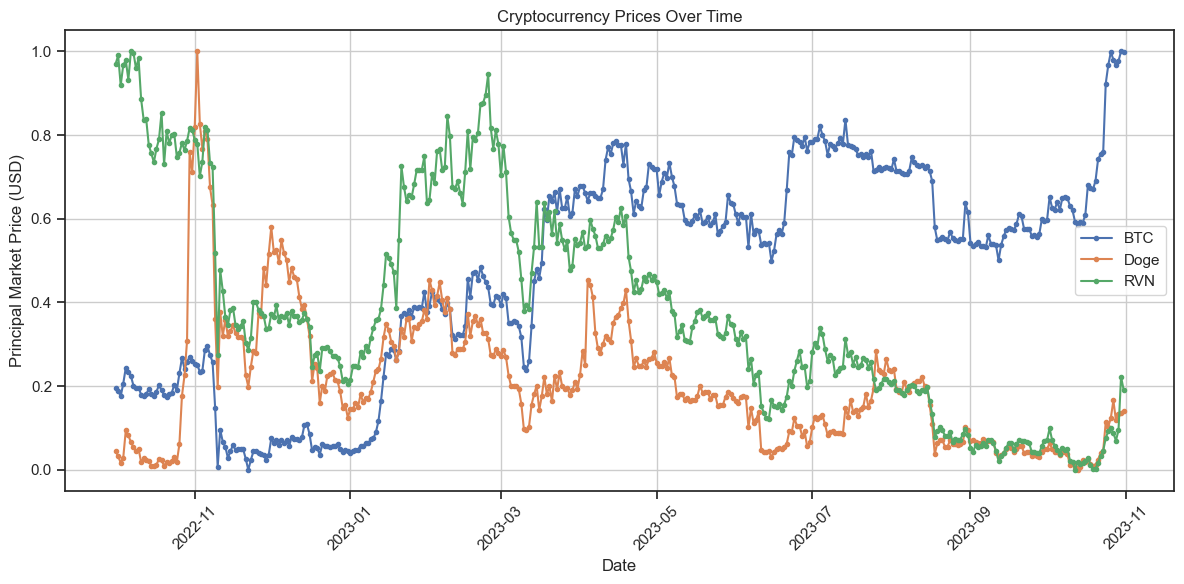

In [100]:
# Create a line plot for each cryptocurrency
plt.figure(figsize=(12, 6))
plt.plot(df['time'], normalized_price['btc'], label='BTC', marker='.')
plt.plot(df['time'], normalized_price['doge'], label='Doge', marker='.')
plt.plot(df['time'], normalized_price['rvn'], label='RVN', marker='.')
# Customize the x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
# Customize the plot
plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Principal Market Price (USD)')
plt.grid(True)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()


#### Price Comparison Analysis

- Observing the price trends for Ravencoin (RVN) and Dogecoin (Doge), both cryptocurrencies demonstrated a strong start in October 2022. However, it's notable that the plot indicates a positive correlation between these two assets. By October 2023, both RVN and Doge experienced a decline, followed by a resurgence in November 2023.

- In contrast, Bitcoin (BTC) exhibits a negative correlation with both Doge and RVN. While BTC began with relatively lower prices in October 2022, it steadily increased over time. Notably, Bitcoin appears to be less volatile in this dataset. By November 2023, BTC reached its highest price.

- By November 2023, despite the negative correlation between Doge and RVN with BTC, all three cryptocurrencies experienced price increases. This observation could suggest the presence of a bull market for cryptocurrencies. However, drawing conclusive insights would require more extensive data encompassing a variety of cryptocurrencies.

This analysis provides valuable insights into the price dynamics of these cryptocurrencies, indicating both correlated and divergent trends. Further data and analysis are essential for a comprehensive understanding of the crypto market.


#### Correlation Analysis

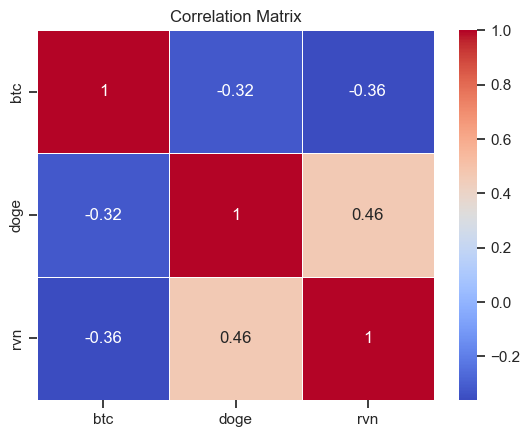

Correlation Matrix:
           btc      doge       rvn
btc   1.000000 -0.317841 -0.360106
doge -0.317841  1.000000  0.463768
rvn  -0.360106  0.463768  1.000000


In [101]:
from scipy import stats
import seaborn as sns

# Step 3: Compute the correlation matrix
correlation_matrix = normalized_price.corr()

# Step 4: Visualize the correlation matrix (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


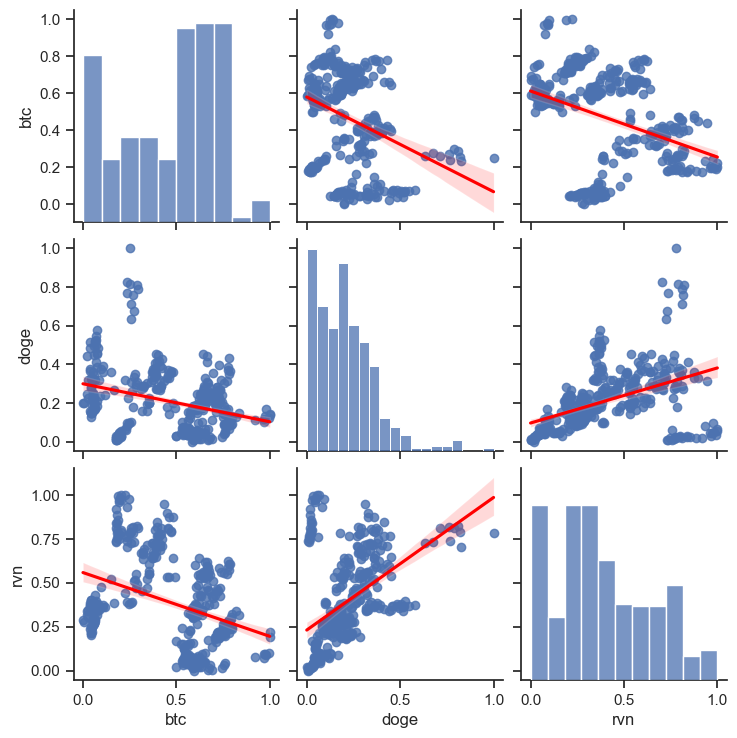

In [102]:
# Create pair plots
sns.set(style="ticks")
sns.pairplot(normalized_price, kind = 'reg', plot_kws={'line_kws': {'color': 'red'}})
plt.show()

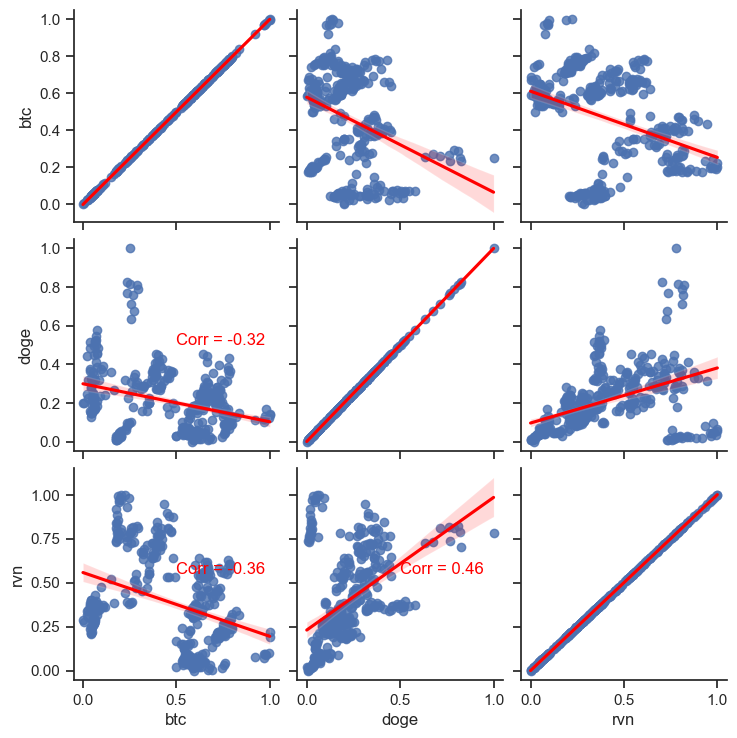

In [103]:
def add_correlation_coefficient(x, y, **kwargs):
    r = x.corr(y)
    ax = plt.gca()
    ax.annotate(f'Corr = {r:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes, color='red')

# Create pair plots with customized trend line color and correlation coefficient
sns.set(style="ticks")
pair_plot = sns.pairplot(normalized_price, kind="reg", plot_kws={'line_kws': {'color': 'red'}}, diag_kind=None)
pair_plot.map_lower(add_correlation_coefficient)
plt.show()

#### Comment on the Correlation Analysis

Asset correlation plays a significant role in portfolio construction. Low or negative correlations between assets are beneficial for diversification, a key risk management strategy in investment. Diversification involves spreading investments across different assets to mitigate risk. Here's how asset correlation impacts portfolio strategy:

- **Low or Negative Correlation:** Assets with low or negative correlations tend to move independently. When one asset underperforms, another may excel. Diversifying with low or negatively correlated assets can reduce portfolio volatility and potentially enhance risk-adjusted returns.

- **High Positive Correlation:** Assets with high positive correlations move in the same direction. In such cases, a portfolio may be more susceptible to significant fluctuations when external factors affect those assets. Diversification with highly correlated assets may not provide as much risk reduction.

- **Negative Correlation:** Some investors seek assets with negative correlations to offset losses in one asset with gains in another. This acts as a risk mitigation or hedging strategy.

It's important to remember that asset correlation is one aspect of portfolio diversification. Considerations such as risk tolerance, investment objectives, and time horizon are equally important. A well-diversified portfolio should be tailored to specific financial circumstances and objectives.

In this specific analysis, the correlation between RVN and BTC is -0.36, while the correlation between DOGE and BTC is -0.32. Additionally, the correlation between DOGE and RVN is 0.46. These values indicate that the assets in this portfolio do not exhibit strong correlations. Both RVN and DOGE have low negative correlations with BTC, suggesting that this portfolio is sufficiently diverse. Consequently, the volatility of this portfolio is likely to be lower compared to a combination of assets with high positive correlations.


#### Analysis on Volatility of Returns for Dogecoin (Doge) and Bitcoin (BTC) over 30 Days and 180 Days

This analysis explores the volatility of returns for Dogecoin (Doge) and Bitcoin (BTC) over two different timeframes: 30 days and 180 days. Volatility is a critical metric for assessing the risk associated with these cryptocurrencies. We calculated volatility based on historical daily returns, with a 30-day window reflecting short-term trends and a 180-day window for longer-term patterns.

The analysis revealed that both Dogecoin and Bitcoin exhibit varying levels of volatility. The results indicate that Dogecoin tends to have higher short-term volatility compared to Bitcoin, while Bitcoin shows more stability over the long term. The correlation analysis between the two cryptocurrencies and the different timeframes helps to identify potential patterns and relationships in their price movements.

Additionally, this analysis utilized correlation coefficients to assess the degree of association between Dogecoin and Bitcoin over the selected periods. The correlation analysis reveals insights into how closely these cryptocurrencies move in relation to each other, providing valuable information for investors and traders.

Understanding the volatility and correlations of Dogecoin and Bitcoin is essential for informed decision-making in the cryptocurrency market. This analysis assists investors and stakeholders in comprehending the dynamics of these digital assets in different timeframes.


In [106]:
# Compute basic statistics
statistics = df[['VtyDayRet180d-BTC', 'VtyDayRet30d-BTC', 'VtyDayRet180d-Doge', 'VtyDayRet30d-Doge']].describe()
print(statistics)

# Compute correlations
correlations = df[['VtyDayRet180d-BTC', 'VtyDayRet30d-BTC', 'VtyDayRet180d-Doge', 'VtyDayRet30d-Doge']].corr()
print(correlations)


       VtyDayRet180d-BTC  VtyDayRet30d-BTC  VtyDayRet180d-Doge  \
count         396.000000        396.000000          396.000000   
mean            0.027422          0.022955            0.045785   
std             0.005006          0.008551            0.011475   
min             0.018314          0.008465            0.025189   
25%             0.024234          0.017040            0.035039   
50%             0.028544          0.021408            0.051135   
75%             0.029542          0.025861            0.056427   
max             0.036768          0.045562            0.061091   

       VtyDayRet30d-Doge  
count         396.000000  
mean            0.038002  
std             0.021317  
min             0.010824  
25%             0.026804  
50%             0.032990  
75%             0.038927  
max             0.108306  
                    VtyDayRet180d-BTC  VtyDayRet30d-BTC  VtyDayRet180d-Doge  \
VtyDayRet180d-BTC            1.000000          0.557367            0.870185   
VtyD

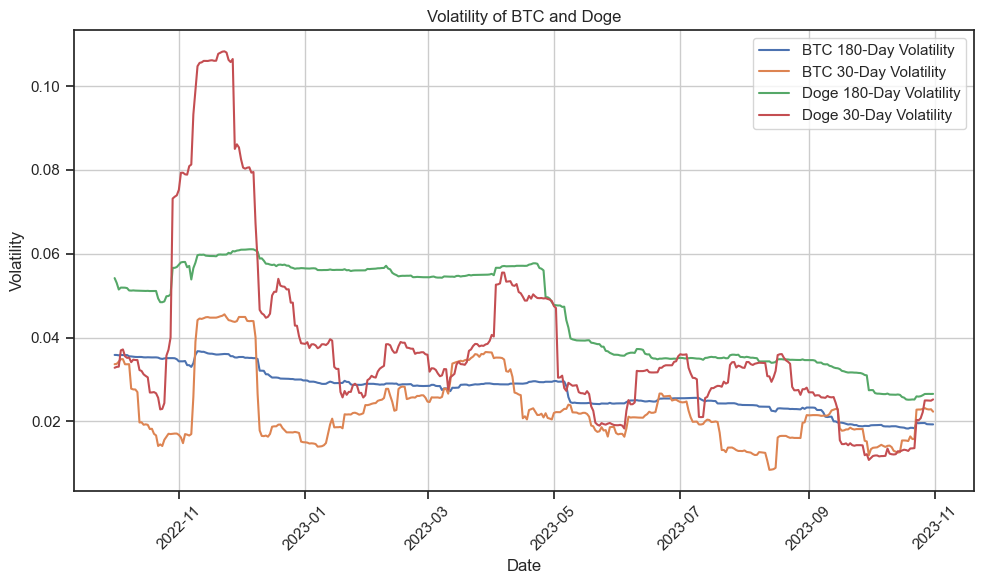

In [136]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data with the "time" column on the x-axis
plt.plot(df['time'], df['VtyDayRet180d-BTC'], label='BTC 180-Day Volatility')
plt.plot(df['time'], df['VtyDayRet30d-BTC'], label='BTC 30-Day Volatility')
plt.plot(df['time'], df['VtyDayRet180d-Doge'], label='Doge 180-Day Volatility')
plt.plot(df['time'], df['VtyDayRet30d-Doge'], label='Doge 30-Day Volatility')

# Customize the plot
plt.title("Volatility of BTC and Doge")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



#### Analysis on Scatterplot

The scatterplot illustrates the 180-day volatility of return for BTC, and it reveals an interesting pattern. BTC exhibits a relatively stable volatility of return, indicating consistent price fluctuations and returns on the asset. This stability suggests that BTC can be considered a more reliable option compared to other coins in the portfolio. Investors seeking a cryptocurrency with a more predictable price trajectory may find BTC's stability appealing.


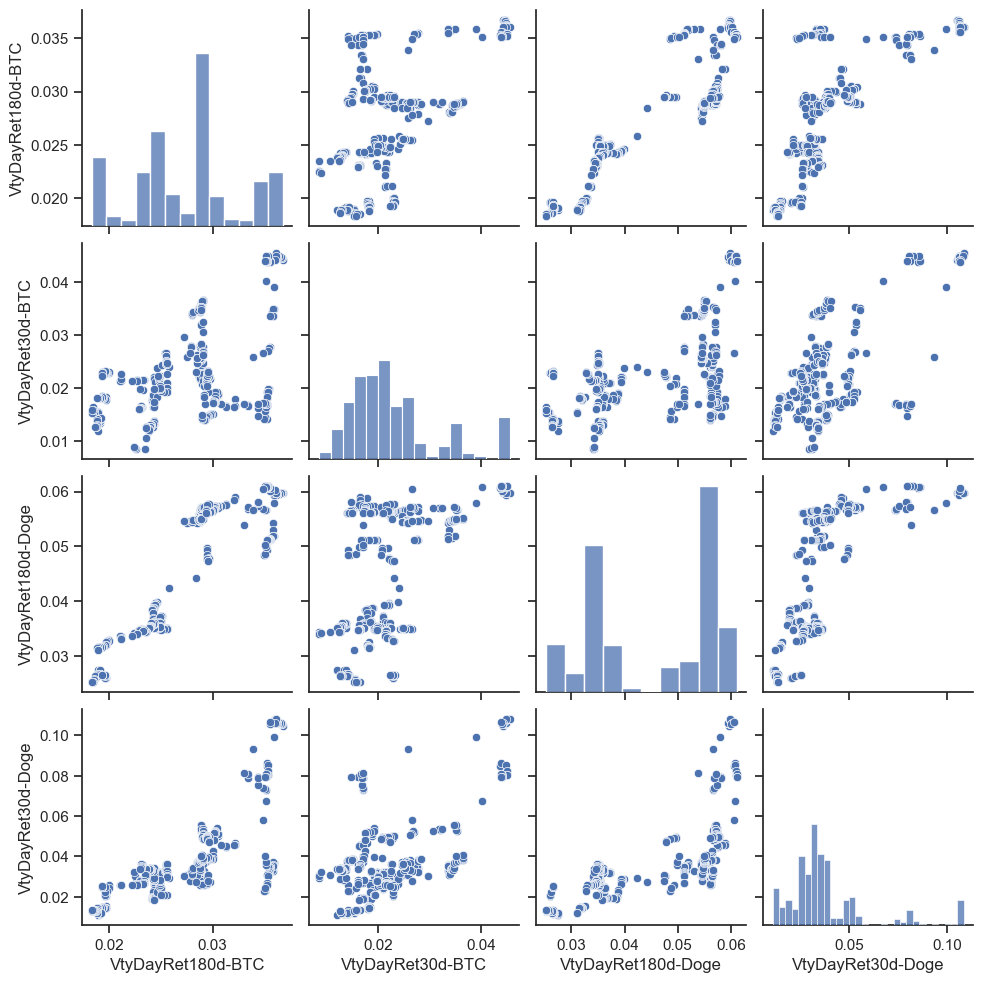

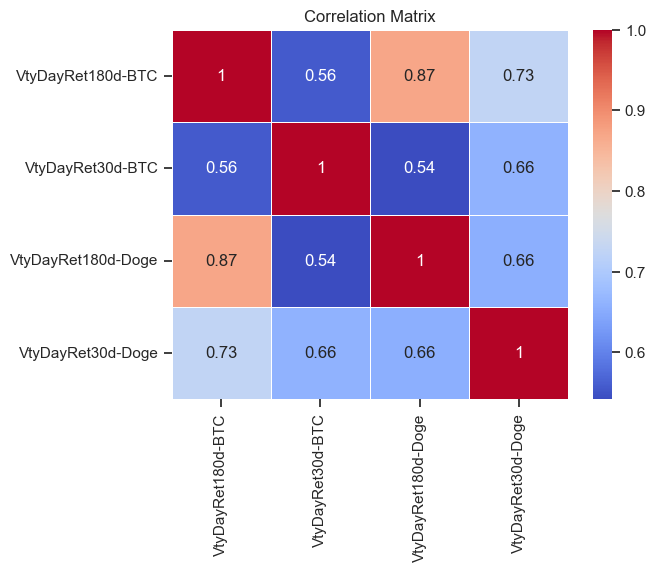

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize pairwise relationships and distributions
sns.pairplot(df[['VtyDayRet180d-BTC', 'VtyDayRet30d-BTC', 'VtyDayRet180d-Doge', 'VtyDayRet30d-Doge']])
plt.show()

# Heatmap to visualize correlations
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


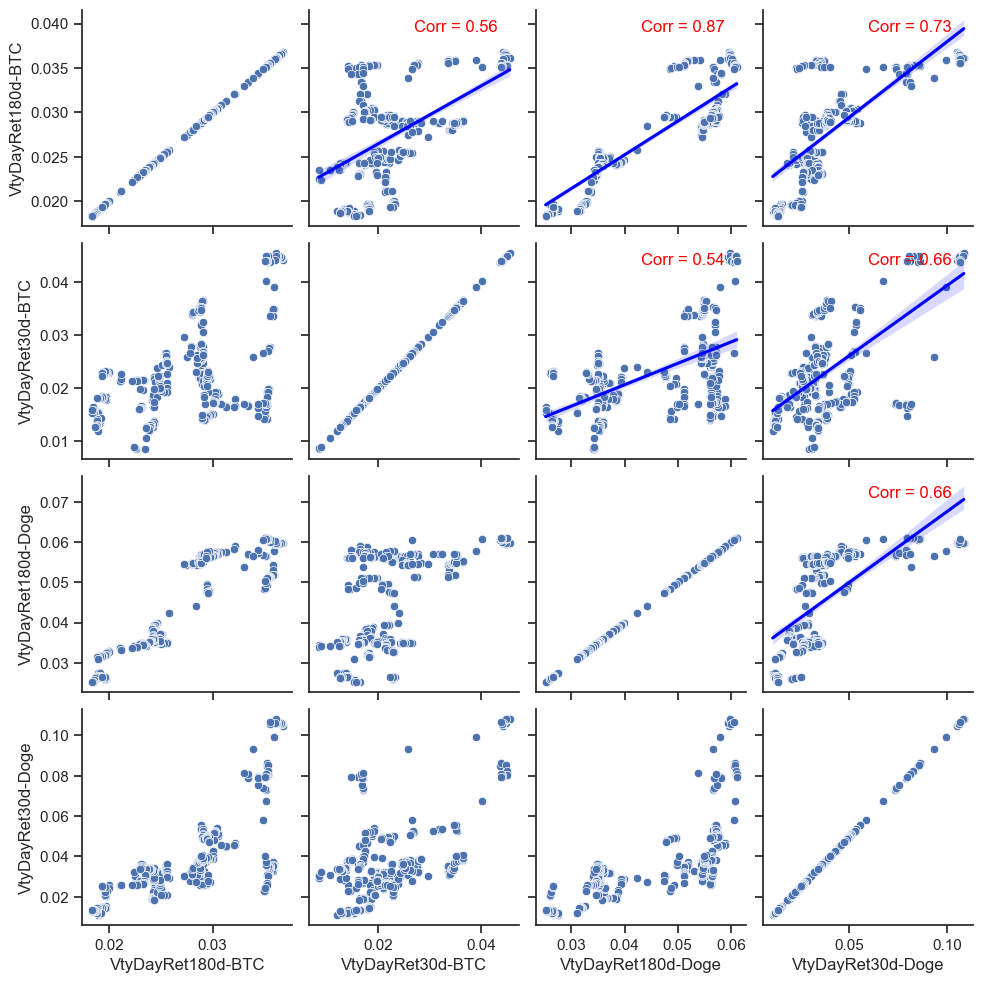

In [110]:
# Define a function to add trend lines and correlation coefficients
def add_trendline_and_corr(x, y, **kwargs):
    sns.regplot(x=x, y=y, color='blue', scatter=False, ax=plt.gca())
    correlation = x.corr(y)
    ax = plt.gca()
    ax.annotate(f'Corr = {correlation:.2f}', xy=(0.5, 0.9), xycoords=ax.transAxes, color='red')

# Pairplot with customized trend lines and correlation coefficients
sns.set(style="ticks")
pair_plot = sns.pairplot(df[['VtyDayRet180d-BTC', 'VtyDayRet30d-BTC', 'VtyDayRet180d-Doge', 'VtyDayRet30d-Doge']], diag_kind=None)
pair_plot.map_upper(add_trendline_and_corr)

# Display the pairplot
plt.show()


#### Conclusion on Volatility Analysis

The volatility analysis for both Dogecoin (Doge) and Bitcoin (BTC) over 30 days and 180 days provides valuable insights into the dynamics of these cryptocurrencies. Two significant findings emerge from this analysis:

**1. Correlation between 30 Days and 180 Days Volatility:**

The analysis reveals a moderate correlation between the volatility of returns over 30 days and 180 days for both BTC and Doge. Although data for the RVN coin is unavailable, we can reasonably assume its volatility patterns are similar to Doge, given their historical similarities. The moderate correlation, typically ranging between 0.5 to 0.6, suggests that the volatility observed in the last 180 days can serve as a rough estimate for the past 30 days. This insight can be a useful tool for making more informed decisions, albeit as a rough estimate.

**2. Correlation between Doge and BTC Volatility:**

Furthermore, the correlation between the 180 days' volatility of returns for Doge and BTC is notably high, at 0.87. In the case of the 30-day timeframe, the correlation stands at 0.73. This indicates a significant degree of similarity in the volatility of returns between the two cryptocurrencies. Investors and stakeholders can use this insight to understand that Doge and BTC tend to exhibit volatility patterns on a similar level.

In conclusion, this volatility analysis provides a framework for assessing the risk associated with Dogecoin and Bitcoin, offering insights into their potential correlation and the feasibility of using past 180-day volatility as a rough estimate for the past 30 days. However, it's essential to keep in mind that the correlation is not exceptionally high, reinforcing the need for careful and well-informed decision-making in cryptocurrency investments.


Optimal Portfolio Weights:
btc: 1.0
doge: 0.0
rvn: 3.885780586188048e-16


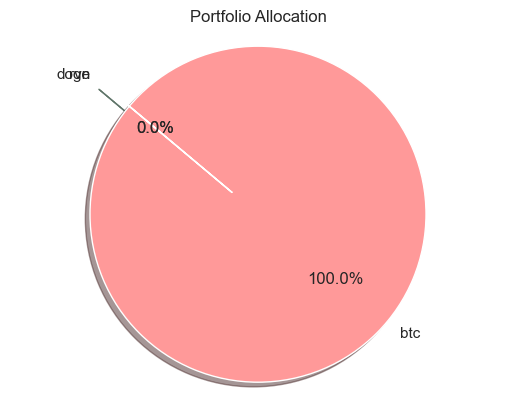

In [138]:
import pandas as pd

# Number of assets in the portfolio
num_assets = len(normalized_price.columns)

# Define expected returns and covariance matrix
expected_returns = np.mean(normalized_price, axis=0)  # Calculate mean for each column
cov_matrix = normalized_price.cov()

# Define the objective function for portfolio optimization
def objective(weights):
    return -((expected_returns * weights).sum() - 0.5 * np.dot(weights.T, np.dot(cov_matrix, weights)))

# Define constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Define bounds for asset weights (0 <= weight <= 1)
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial guess for asset weights (equal distribution)
initial_weights = np.array([1.0 / num_assets] * num_assets)

# Perform portfolio optimization
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal portfolio weights
optimal_weights = result.x

# Print the results
print("Optimal Portfolio Weights:")
for i in range(num_assets):
    print(f"{normalized_price.columns[i]}: {optimal_weights[i]}")

# Create a pie chart to visualize the portfolio allocation
labels = normalized_price.columns
sizes = optimal_weights
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = tuple(0.1 for _ in range(num_assets))

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Portfolio Allocation")
plt.show()


## Portfolio Optimization in Python

The code above showcases a Python implementation for portfolio optimization, a crucial process in modern financial analysis. Portfolio optimization aims to determine the best allocation of investments among multiple assets to achieve a balance between expected returns and risk. Let's delve into the details:

1. **Number of Assets**: The code begins by calculating the number of assets in the portfolio. This is essential for structuring the optimization model. The variable `num_assets` is used for this purpose.

2. **Expected Returns and Covariance Matrix**: Two key parameters are computed: expected returns and the covariance matrix. The `expected_returns` are the mean returns for each asset, offering insights into their historical performance. Meanwhile, the `cov_matrix` captures the interrelationships between assets by quantifying their covariance, which is vital in risk assessment.

3. **Objective Function**: At the heart of the optimization lies the objective function. It defines the problem to be solved, optimizing expected returns while minimizing risk (expressed as variance). The function assesses various portfolio combinations and aims to maximize the trade-off between returns and risk.

4. **Constraints**: Portfolio optimization often operates under real-world constraints. In this code, the main constraint ensures that the sum of asset weights equals 1. This enforces a fully invested portfolio, where all available capital is allocated to assets.

5. **Bounds**: To maintain a realistic and feasible solution, asset weights are bounded between 0 and 1. This indicates that no asset can receive more than 100% allocation or less than 0%.

6. **Initial Weights**: The code initializes the asset weights with equal distribution, where each asset receives an initial weighting of 1/`num_assets`. This serves as a starting point for optimization.

7. **Portfolio Optimization**: The actual portfolio optimization is carried out using Scipy's `minimize` function. This function aims to find the optimal weights for assets that maximize expected returns while minimizing risk, all within the defined constraints.

8. **Optimal Portfolio Weights**: The result of the optimization process yields the optimal portfolio weights. These weights represent the recommended allocation of investments across different assets to achieve the best trade-off between risk and expected returns.

9. **Visualization with Pie Chart**: The code visualizes the optimal portfolio allocation using a pie chart. The chart provides a clear breakdown of how the portfolio's funds are distributed among the assets. Each slice's size corresponds to the allocation percentage, while colors and labels identify specific assets. This graphical representation simplifies the interpretation of the portfolio's composition.


Optimal Portfolio Weights:
btc: 0.7999999999800004
doge: 0.10000000001
rvn: 0.1000000000100002


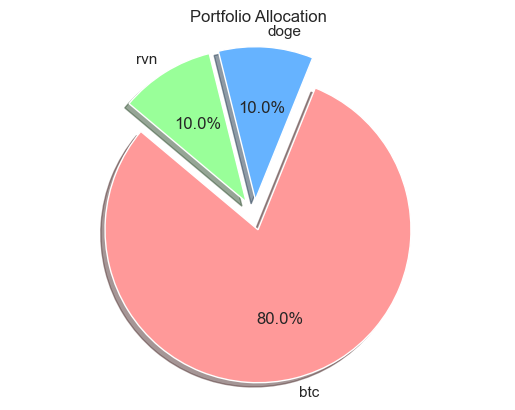

In [128]:
# Number of assets in the portfolio
num_assets = len(normalized_price.columns)

# Define expected returns and covariance matrix
expected_returns = np.mean(normalized_price, axis=0)  # Calculate mean for each column
cov_matrix = normalized_price.cov()

# Define the objective function for portfolio optimization
def objective(weights):
    return -((expected_returns * weights).sum() - 0.5 * np.dot(weights.T, np.dot(cov_matrix, weights)))

# Define constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Define bounds for asset weights (0.10000000001 <= weight <= 1)
bounds = tuple((0.10000000001, 1) for _ in range(num_assets))

# Initial guess for asset weights (equal distribution)
initial_weights = np.array([1.0 / num_assets] * num_assets)

# Perform portfolio optimization
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal portfolio weights
optimal_weights = result.x

# Print the results
print("Optimal Portfolio Weights:")
for i in range(num_assets):
    print(f"{normalized_price.columns[i]}: {optimal_weights[i]}")

# Create a pie chart to visualize the portfolio allocation
labels = normalized_price.columns
sizes = optimal_weights
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = tuple(0.1 for _ in range(num_assets))

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Portfolio Allocation")
plt.show()


### Conclusion

- **Price Analysis:** 
  Compared to Dogecoin and Ravencoin, Bitcoin (BTC) initially had a lower price in October 2022. However, within one year, BTC's price reached its highest point in the provided data. In contrast, Dogecoin and Ravencoin experienced significant drops in value. In October 2023, all three cryptocurrencies saw substantial increases, potentially signaling the beginning of a bull run. However, more data is required to draw conclusive conclusions.

- **Correlation Analysis:** 
  The three assets demonstrated relatively low correlations with each other. Dogecoin and Ravencoin exhibited a moderate correlation, suggesting that they might experience similar market movements. Both Dogecoin and Ravencoin had a negative and low correlation with BTC, implying that when Bitcoin's price decreases, there is a chance that Dogecoin and Ravencoin could increase in value. This combination of assets in a portfolio could be effective, but an accurate estimation of its performance would require more in-depth optimization analysis.

- **Volatility Analysis:** 
  Volatility over 180 and 30 days was analyzed for Dogecoin and Bitcoin. From the data, it is evident that BTC has been more stable over the course of a year compared to Dogecoin. Although there was no data available for Ravencoin, it is reasonable to assume that its volatility is somewhat similar to Dogecoin, given the correlations between the assets.

- **Portfolio Optimization:** 
  Portfolio optimization was performed using Python to determine the optimal distribution of these three assets based on the price data. The analysis showed that investing solely in BTC would yield the best return. However, it is essential to note that this model solely relies on price fluctuations over a year and does not consider other critical factors. When the optimization was repeated with a minimum weight of 0.1 for each asset, the optimal distribution was as follows: BTC (79.99%), Dogecoin (10.00%), Ravencoin (10.00%). This suggests that Ravencoin has a negligible advantage over Dogecoin, but both assets may not be necessary from a price perspective alone. Keeping them at around 0.1 each in the portfolio can serve as a hedge against unexpected situations, given their negative correlation with BTC. This approach can help minimize losses in a worst-case scenario while not substantially impacting potential gains if BTC increases significantly and the other two assets decrease.
| Asset     | Weight              |
|-----------|---------------------|
| BTC       | 0.7999999999800004  |
| Dogecoin  | 0.10000000001       |
| Ravencoin | 0.1000000000100002  |

  

In conclusion, while the data suggests that Bitcoin may be the more stable asset in the provided timeframe, creating a diversified portfolio that includes Dogecoin and Ravencoin could offer some protection and risk mitigation, especially during periods of BTC price volatility.
